In [1]:
import sys
sys.path.insert(0, '../tree/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import time
from mixetree import MixETree

In [2]:
node_list = [[[13, 2, 2], 8, [4, 4], [2, 22]], 
             [2, 13], [[2, 2, 2, 2, 2], 10], [[2, 2, 4], [2, 6]], 
             [4, 4, [8, 2]]]
alpha_true = [0.4, -0.3, 0.3]
base_rate_true = 0.1
n_cov = 3

In [3]:
data = pd.read_csv('../data/test/sim_data_tiny_1568922732.csv')
meas_std = .05
data['meas_std'] = meas_std
data['meas_val'] = data['true_val']*(1 + np.random.randn(data.shape[0])*meas_std)

In [4]:
file_path = '../data/test/20190919_1568922732/'
hold_out = ['1_5', '1_4_2']
hold_out_leaves = [('1_1_1_1', .4), ('1_2_2', .4)]
mtr = MixETree(data, node_list, n_cov, file_path, hold_out, hold_out_leaves)

In [5]:
data.head()

,Unnamed: 0,cov1,cov2,cov3,hold_out,leaf,level_0,level_0_u,level_1,level_1_u,level_2,level_2_u,level_3,meas_std,meas_val,n_data_in_leaf,node,true_val,hold_out_branch
0,0,0.158863,0.235319,0.412593,True,1_1_1_1,1,-0.819048,1_1,-0.278462,1_1_1,-0.542971,1_1_1_1,0.05,0.020684,13,1_1_1_1,0.021789,1_1_1_1
1,1,0.362580,0.232722,0.224204,True,1_1_1_1,1,-0.819048,1_1,-0.278462,1_1_1,-0.542971,1_1_1_1,0.05,0.023332,13,1_1_1_1,0.022358,1_1_1_1
2,2,0.202682,0.189160,0.251344,True,1_1_1_1,1,-0.819048,1_1,-0.278462,1_1_1,-0.542971,1_1_1_1,0.05,0.022030,13,1_1_1_1,0.021422,1_1_1_1
3,3,0.078406,-0.117362,-0.042118,True,1_1_1_1,1,-0.819048,1_1,-0.278462,1_1_1,-0.542971,1_1_1_1,0.05,0.021045,13,1_1_1_1,0.020463,1_1_1_1
4,4,-0.270412,0.134604,0.170277,True,1_1_1_1,1,-0.819048,1_1,-0.278462,1_1_1,-0.542971,1_1_1_1,0.05,0.016606,13,1_1_1_1,0.017588,1_1_1_1


#### Oracle

In [6]:
import time
t0 = time.time()
mtr.fit_low_level('oracle',{'iota':([base_rate_true], [0], 'uniform'), 
                'alpha': (alpha_true, [0]*n_cov, 'uniform')}, zero_sum=True, use_lambda=False)
print('elapsed', time.time() - t0)

../data/test/20190919_1568922732/ns_node_1.db init
../data/test/20190919_1568922732/ns_node_1.db fit both
holdout  1_5
../data/test/20190919_1568922732/ns_node_1_4.db init
../data/test/20190919_1568922732/ns_node_1_4.db fit both
holdout  1_4_2
../data/test/20190919_1568922732/ns_node_1_1_2.db init
../data/test/20190919_1568922732/ns_node_1_1_2.db fit fixed
../data/test/20190919_1568922732/ns_node_1_1_2.db set start_var fit_var
../data/test/20190919_1568922732/ns_node_1_1_2.db set scale_var fit_var
../data/test/20190919_1568922732/ns_node_1_1_1.db init
../data/test/20190919_1568922732/ns_node_1_1_1.db fit both
../data/test/20190919_1568922732/ns_node_1_1_3.db init
../data/test/20190919_1568922732/ns_node_1_1_3.db fit both
../data/test/20190919_1568922732/ns_node_1_1_4.db init
../data/test/20190919_1568922732/ns_node_1_1_4.db fit both
../data/test/20190919_1568922732/ns_node_1_2.db init
../data/test/20190919_1568922732/ns_node_1_2.db fit both
../data/test/20190919_1568922732/ns_node_1_3_

In [7]:
rel_err = []
rel_err.append((mtr.df[mtr.df['hold_out'] == False]['oracle_avgint'] - 
                mtr.df[mtr.df['hold_out'] == False]['true_val'])/np.abs(mtr.df[mtr.df['hold_out'] == False]['true_val']))
rel_err.append((mtr.df[mtr.df['hold_out'] == True]['oracle_avgint'] - 
                mtr.df[mtr.df['hold_out'] == True]['true_val'])/np.abs(mtr.df[mtr.df['hold_out'] == True]['true_val'])) 

relative error mean 0.0522717612807 std 0.219853276727


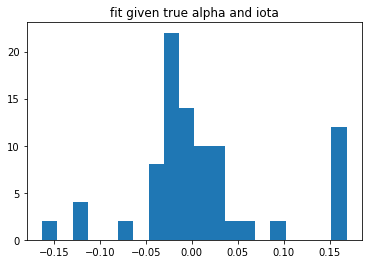

In [8]:
print('relative error mean', np.mean(np.abs(rel_err[0])), 'std', np.std(rel_err[1]))
plt.hist(rel_err[0], bins=20);
plt.title('fit given true alpha and iota');

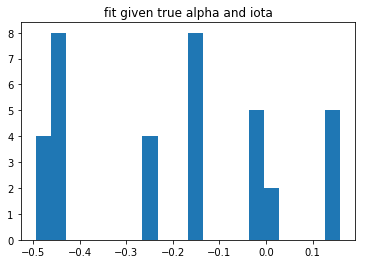

In [9]:
plt.hist(rel_err[1], bins=20);
plt.title('fit given true alpha and iota');

#### Bottom fit

In [10]:
import time
t0 = time.time()
mtr.reset()
mtr.fit_low_level('direct_bottom',zero_sum=True, use_lambda=False, add_intercept=False)
print('elapsed', time.time() - t0)

../data/test/20190919_1568922732/ns_node_1.db init
../data/test/20190919_1568922732/ns_node_1.db fit both
holdout  1_5
../data/test/20190919_1568922732/ns_node_1_4.db init
../data/test/20190919_1568922732/ns_node_1_4.db fit both
holdout  1_4_2
../data/test/20190919_1568922732/ns_node_1_1_2.db init
../data/test/20190919_1568922732/ns_node_1_1_2.db fit fixed
../data/test/20190919_1568922732/ns_node_1_1_2.db set start_var fit_var
../data/test/20190919_1568922732/ns_node_1_1_2.db set scale_var fit_var
../data/test/20190919_1568922732/ns_node_1_1_1.db init
../data/test/20190919_1568922732/ns_node_1_1_1.db fit both
../data/test/20190919_1568922732/ns_node_1_1_3.db init
../data/test/20190919_1568922732/ns_node_1_1_3.db fit both
../data/test/20190919_1568922732/ns_node_1_1_4.db init
../data/test/20190919_1568922732/ns_node_1_1_4.db fit both
../data/test/20190919_1568922732/ns_node_1_2.db init
../data/test/20190919_1568922732/ns_node_1_2.db fit both
../data/test/20190919_1568922732/ns_node_1_3_

In [11]:
alphas = []
for i in range(n_cov):
    vals = [x['cov'+str(i+1)] for k, x in mtr.alpha_est.items()]
    print('alpha ', str(i+1), np.median(vals), ' std', np.std(vals))
    alphas.append(np.median(vals))
mtr.fit_low_level('direct_bottom',{'alpha': (alphas, [0]*n_cov, 'uniform')}, zero_sum=True, add_intercept=False)

alpha  1 0.41032  std 0.139039650661
alpha  2 -0.326655  std 0.238365217596
alpha  3 0.30511  std 0.263943853971
../data/test/20190919_1568922732/ns_node_1.db init
../data/test/20190919_1568922732/ns_node_1.db fit both
holdout  1_5
../data/test/20190919_1568922732/ns_node_1_4.db init
../data/test/20190919_1568922732/ns_node_1_4.db fit both
holdout  1_4_2
../data/test/20190919_1568922732/ns_node_1_1_2.db init
../data/test/20190919_1568922732/ns_node_1_1_2.db fit fixed
../data/test/20190919_1568922732/ns_node_1_1_2.db set start_var fit_var
../data/test/20190919_1568922732/ns_node_1_1_2.db set scale_var fit_var
../data/test/20190919_1568922732/ns_node_1_1_1.db init
../data/test/20190919_1568922732/ns_node_1_1_1.db fit both
../data/test/20190919_1568922732/ns_node_1_1_3.db init
../data/test/20190919_1568922732/ns_node_1_1_3.db fit both
../data/test/20190919_1568922732/ns_node_1_1_4.db init
../data/test/20190919_1568922732/ns_node_1_1_4.db fit both
../data/test/20190919_1568922732/ns_node_1

In [12]:
rel_err = []
rel_err.append((mtr.df[mtr.df['hold_out'] == False]['direct_bottom_avgint'] - 
                mtr.df[mtr.df['hold_out'] == False]['true_val'])/np.abs(mtr.df[mtr.df['hold_out'] == False]['true_val']))
rel_err.append((mtr.df[mtr.df['hold_out'] == True]['direct_bottom_avgint'] - 
                mtr.df[mtr.df['hold_out'] == True]['true_val'])/np.abs(mtr.df[mtr.df['hold_out'] == True]['true_val'])) 

relative error mean 0.0522706877325 std 0.220589607767


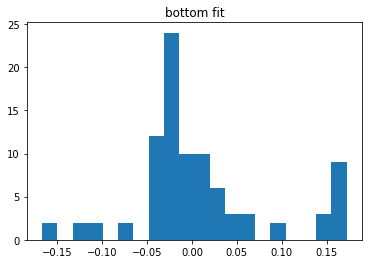

In [13]:
print('relative error mean', np.mean(np.abs(rel_err[0])), 'std', np.std(rel_err[1]))
plt.hist(rel_err[0], bins=20);
plt.title('bottom fit');

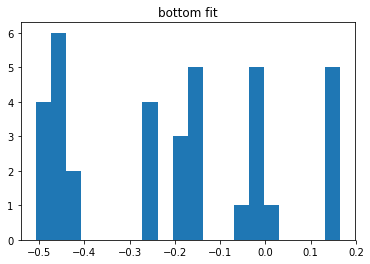

In [14]:
plt.hist(rel_err[1], bins=20);
plt.title('bottom fit');

#### Top-bottom

In [15]:
import time
t0 = time.time()
mtr.fit_no_sim('top_bottom', zero_sum=True, use_lambda=False)
print('elapsed', time.time() - t0)

../data/test/20190919_1568922732/node_1.db init
../data/test/20190919_1568922732/node_1.db fit both
holdout  1_5
../data/test/20190919_1568922732/ns_node_1_4.db init
../data/test/20190919_1568922732/ns_node_1_4.db fit both
holdout  1_4_2
../data/test/20190919_1568922732/ns_node_1_1_2.db init
../data/test/20190919_1568922732/ns_node_1_1_2.db fit fixed
../data/test/20190919_1568922732/ns_node_1_1_2.db set start_var fit_var
../data/test/20190919_1568922732/ns_node_1_1_2.db set scale_var fit_var
../data/test/20190919_1568922732/ns_node_1_1_1.db init
../data/test/20190919_1568922732/ns_node_1_1_1.db fit both
../data/test/20190919_1568922732/ns_node_1_1_3.db init
../data/test/20190919_1568922732/ns_node_1_1_3.db fit both
../data/test/20190919_1568922732/ns_node_1_1_4.db init
../data/test/20190919_1568922732/ns_node_1_1_4.db fit both
../data/test/20190919_1568922732/ns_node_1_2.db init
../data/test/20190919_1568922732/ns_node_1_2.db fit both
../data/test/20190919_1568922732/ns_node_1_3_2.db i

In [16]:
alphas = []
for i in range(n_cov):
    print('alpha ', str(i+1), mtr.alpha_est['1']['cov'+str(i+1)])
    alphas.append(mtr.alpha_est['1']['cov'+str(i+1)])
rel_err = (mtr.df['top_bottom_avgint'] - mtr.df['true_val'])/mtr.df['true_val']
print('relative error mean', np.mean(np.abs(rel_err)), 'std', np.std(rel_err))

alpha  1 0.4342
alpha  2 -0.29719
alpha  3 0.24679
relative error mean 0.104637104095 std 0.168008230006


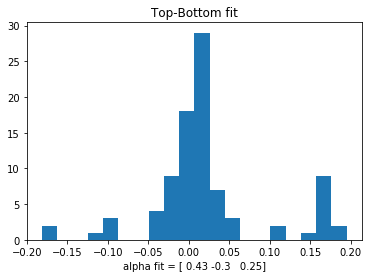

In [17]:
rel_err = []
rel_err.append((mtr.df[mtr.df['hold_out'] == False]['top_bottom_avgint'] - 
                mtr.df[mtr.df['hold_out'] == False]['true_val'])/np.abs(mtr.df[mtr.df['hold_out'] == False]['true_val']))
rel_err.append((mtr.df[mtr.df['hold_out'] == True]['top_bottom_avgint'] - 
                mtr.df[mtr.df['hold_out'] == True]['true_val'])/np.abs(mtr.df[mtr.df['hold_out'] == True]['true_val'])) 
plt.hist(rel_err[0], bins=20);
plt.title('Top-Bottom fit')
plt.xlabel('alpha fit = '+str(np.round(alphas,2)));

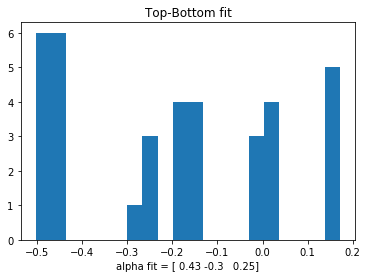

In [18]:
plt.hist(rel_err[1], bins=20);
plt.title('Top-Bottom fit')
plt.xlabel('alpha fit = '+str(np.round(alphas,2)));

In [19]:
import time
t0 = time.time()
mtr.fit_no_sim('top_bottom2', no_leaf=True, zero_sum=True, use_lambda=False)
print('elapsed', time.time() - t0)

../data/test/20190919_1568922732/node_1.db init
../data/test/20190919_1568922732/node_1.db fit both
holdout  1_5
../data/test/20190919_1568922732/ns_node_1_4.db init
../data/test/20190919_1568922732/ns_node_1_4.db fit both
holdout  1_4_2
../data/test/20190919_1568922732/ns_node_1_1.db init
../data/test/20190919_1568922732/ns_node_1_1.db fit both
../data/test/20190919_1568922732/ns_node_1_1_1.db init
../data/test/20190919_1568922732/ns_node_1_1_1.db fit both
../data/test/20190919_1568922732/ns_node_1_1_3.db init
../data/test/20190919_1568922732/ns_node_1_1_3.db fit both
../data/test/20190919_1568922732/ns_node_1_1_4.db init
../data/test/20190919_1568922732/ns_node_1_1_4.db fit both
../data/test/20190919_1568922732/ns_node_1_2.db init
../data/test/20190919_1568922732/ns_node_1_2.db fit both
../data/test/20190919_1568922732/ns_node_1_3.db init
../data/test/20190919_1568922732/ns_node_1_3.db fit both
../data/test/20190919_1568922732/ns_node_1_3_1.db init
../data/test/20190919_1568922732/ns

In [20]:
alphas = []
for i in range(n_cov):
    print('alpha ', str(i+1), mtr.alpha_est['1']['cov'+str(i+1)])
    alphas.append(mtr.alpha_est['1']['cov'+str(i+1)])

alpha  1 0.4342
alpha  2 -0.29719
alpha  3 0.24679


#### Cascade fit, use $\gamma$ to inflate variance of priors

In [21]:
import time
t0 = time.time()
mtr.fit_sim('cascade', n_sim=10, use_lambda=False, zero_sum=True)
print('elapsed', time.time() - t0)

../data/test/20190919_1568922732/s_node_1.db init
../data/test/20190919_1568922732/s_node_1.db fit both
holdout  1_5
../data/test/20190919_1568922732/s_node_1.db set truth_var fit_var
../data/test/20190919_1568922732/s_node_1.db set start_var fit_var
../data/test/20190919_1568922732/s_node_1.db set scale_var fit_var
../data/test/20190919_1568922732/s_node_1.db simulate 10
../data/test/20190919_1568922732/s_node_1.db sample simulate 10
../data/test/20190919_1568922732/s_node_1.db predict sample
../data/test/20190919_1568922732/s_node_1_1.db init
../data/test/20190919_1568922732/s_node_1_1.db fit both
../data/test/20190919_1568922732/s_node_1_1.db set truth_var fit_var
../data/test/20190919_1568922732/s_node_1_1.db set start_var fit_var
../data/test/20190919_1568922732/s_node_1_1.db set scale_var fit_var
../data/test/20190919_1568922732/s_node_1_1.db simulate 10
../data/test/20190919_1568922732/s_node_1_1.db sample simulate 10
../data/test/20190919_1568922732/s_node_1_1.db predict sample

In [22]:
alphas = []
for i in range(n_cov):
    vals = [x['cov'+str(i+1)] for k, x in mtr.alpha_est.items()]
    print('median alpha', str(i+1), np.median(vals), 'std', np.std(vals))
    alphas.append(np.median(vals))
    #plt.hist(vals)

median alpha 1 0.36828 std 0.035582393413
median alpha 2 -0.34361 std 0.0576328686515
median alpha 3 0.222195 std 0.0376045499375


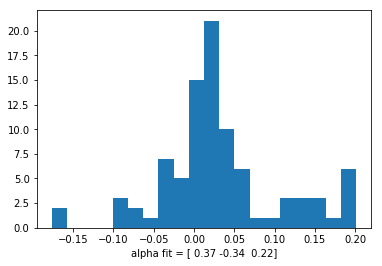

In [23]:
rel_err = []
rel_err.append((mtr.df[mtr.df['hold_out'] == False]['cascade_avgint'] - 
                mtr.df[mtr.df['hold_out'] == False]['true_val'])/np.abs(mtr.df[mtr.df['hold_out'] == False]['true_val']))
rel_err.append((mtr.df[mtr.df['hold_out'] == True]['cascade_avgint'] - 
                mtr.df[mtr.df['hold_out'] == True]['true_val'])/np.abs(mtr.df[mtr.df['hold_out'] == True]['true_val'])) 
plt.hist(rel_err[0], bins=20);
plt.xlabel('alpha fit = '+str(np.round(alphas,2)));

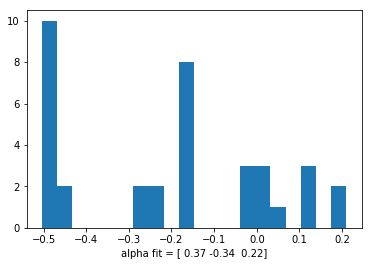

In [24]:
plt.hist(rel_err[1], bins=20);
plt.xlabel('alpha fit = '+str(np.round(alphas,2)));